# Seminar 5. Decision Trees

Given $X$ is a **feature matrix**, $y$ is a **target**, and a **dataset** $\{x_i, y_i\}_{i=1}^K$, where $x_i \in \mathbb{R}^N$

On each step an algorithm splits a dataset to two parts $R_1(j,s)=\{x|x_j \leq s\}$ and $R_2(j,s) = \{x | x_j > s \}$

#### Question

<details>
    <summary>What types of problems can we solve using Decision Trees?</summary>
    
Decision Trees are used to solve a variety of **classification** (yes/no, categories) and **regression** (predicting numbers) problems in different fields
    
</details>

## Classification Problem

<img src='images/seminar_05/tree.png' Width=900>

#### Question

<details>
    <summary>How do we find the optimal feature and threshold for splitting at each node in a Decision Tree?</summary>
    
At each node, the Decision Tree algorithm selects the best feature and best threshold (split point) by evaluating all possible splits. The goal is to **maximize information gain** or **reduce impurity** in the resulting subsets.
    
Using **the greedy algorithm** for that:
    
1. Consider each feature 
2. Try different thresholds: 
    - If the feature is numerical, try different split points
    - If the feature is categorical, split based on category value
3. Calculate the values of an information criteria for each spliting and choose the best
    
</details>

### Information criteria

$R_m$ - a set of objects from dataset that fall into the vertex $m$, $N_m=|R_m|$.

$p_{mk}$ - a part of objects of a class $k\in\{1, ..., K\}$ fall into the vertex $m$.

$p_{mk}=\frac{1}{N_m} \sum\limits_{x_i\in R_m} [y_i = k]$.

$k_m = \arg \max\limits_{k} p_{mk}$ - the class whose representatives are the most numerous among the objects that reached the vertex $m$.

If vertex $m$ is a leaf and we assume that it assignes all objects to class $k$:

$H(R_m) = \frac{1}{N_m} \sum\limits_{x_i \in R_m} [y_i \neq k_m]$

Information criterion for branching of vertex $m$: ($l$ and $r$ are right and left vertices):

$Q(R_m, j, s) = H (R_m) - \frac{N_l}{N_m} H(R_l) - \frac{N_r}{N_m} H(R_r) \to \max\limits_{j, s}$

$H(R)$ - is measure of "heterogeneity" of data. 

### Misclassification criteria

$H(R_m) = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m]$

Express using $p_{m, k_m}$:

$1 = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m] + \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i = k_m]$

$p_{mk}=\frac{1}{N_m} \sum\limits_{x_i\in R_m} [y_i = k]$

$H(R_m) = 1 - p_{m, k_m}$

### Gini impurity

$H(R_m) = \sum\limits_{k \neq k'}p_{mk}p_{mk'}$

#### Question

<details>
<summary>What probabilistic meaning does Gini impurity have?</summary>
    
For two random objects taken from the sample we estimate what is the probability of belonging to different classes.
</details>

Express using $p_{m, k_m}$:

$H(R_m) = \sum\limits_{k \neq k'}p_{mk}p_{mk'}$

$\sum_{k \neq k'} p_{mk} p_{mk'} = \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'} = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk})$

$H(R_m) = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) = 1 - \sum_{k = 1}^K p_{mk}^2$

### Entropy criteria

$H(p) = -\sum_{k = 1}^{K} p_k \log_2 p_k$

### Stopping criterias

**Maximum Depth** (`max_depth`)

This criterion limits how deep the tree can grow. Once the specified maximum depth is reached, the algorithm stops further splits on nodes at that depth.

Effect: Restricting depth helps prevent the model from learning too much detail (overfitting), as deeper trees can fit the training data very closely.

**Minimum Samples per Split** (`min_samples_split`)

This criterion specifies the minimum number of samples required to split a node. If a node contains fewer than this number of samples, it will not be split further.

Effect: It prevents creating splits based on very few samples, which could lead to highly specific and less generalizable rules.

**Minimum Samples per Leaf** (`min_samples_leaf`)

This criterion enforces a minimum number of samples that must be present in a leaf node after splitting. If a split results in any leaf with fewer than this number of samples, that split is discarded.

Effect: It helps avoid leaves with very few samples, ensuring each leaf has a sufficient number of samples to represent a meaningful class distribution.

**Maximum Number of Nodes** (`max_leaf_nodes`)

This criterion limits the total number of leaf nodes in the tree. Once the specified number of leaf nodes is reached, the tree stops growing.

Effect: It provides a way to constrain the tree’s complexity by controlling the number of end-points or outcomes the tree can have.

**Minimum Reduction in Impurity** (`min_impurity_decrease`)

This criterion stops further splitting if the reduction in impurity (such as entropy or Gini impurity) from a split is below a specified threshold.

Effect: Prevents further splitting when the information gain or impurity reduction is minimal, as it likely indicates that additional splits won’t contribute significantly to the model’s predictive power.

**Early Stopping Based on Validation Set**

This technique involves monitoring the performance of the decision tree on a validation set and stopping when the performance starts to degrade (a sign of overfitting).

Effect: Early stopping helps ensure that the tree generalizes well to unseen data, halting growth before overfitting occurs.

**Pure Node Criterion**

A node is considered “pure” if all samples in it belong to the same class. Some algorithms stop splitting further if a node is pure, as further splits are unnecessary.

Effect: Reduces the depth of the tree by avoiding unnecessary splits, especially when all samples in a node are of the same class, ensuring no further gain from splitting.

**Depth-Dependent Regularization (e.g., alpha for Cost Complexity Pruning)**

Cost complexity pruning penalizes deeper trees based on a regularization parameter, alpha, which is part of post-pruning in decision trees like CART (Classification and Regression Trees).

Effect: Introduces a penalty for complexity, which controls the size of the tree and reduces the likelihood of overfitting. Smaller values of alpha allow the tree to grow more complex; higher values encourage more pruning.

#### Questions

<details>
    <summary>Why do we use stopping criteria in Decision Trees?</summary>
    
**Prevent Overfitting**: Too many splits make the tree highly specific to the training data, reducing its ability to generalize to new data.

**Improve Efficiency**: A deeper tree requires more computation and memory, making predictions slower.
    
**Simplify the Model**: A smaller tree is easier to interpret and explain.
    
</details>

<details>
    <summary>Can we consider these criteria as a form of regularization?</summary>
    
Yes! Using stopping criteria is a way to regularize Decision Trees. Regularization techniques help prevent overfitting by controlling model complexity.

- In deep learning, we use dropout or L2 regularization.

- In Decision Trees, we use stopping criteria and pruning.
    
</details>

## Dataset

In [1]:
import pandas

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

df_iris = pandas.DataFrame(
    data=iris.data, 
    columns=iris.feature_names
)

df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature_names = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
]

X = df_iris[feature_names].to_numpy()
Y = df_iris['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Implementation

In [3]:
class Node:
    def __init__(self, ...):
        # YOUR CODE HERE

    def is_leaf(self):
        return # YOUR CODE HERE

#### Questions

<details>
<summary>What attributes do we need to add in the class above?</summary>
    
`feature` - the index of the feature to split on

`threshold` - the threshold to split at
    
`left` - the left child node
 
`right` - the right child node
    
`value` - the values if it's a leaf node
    
</details>

<details>
<summary>How could we check the node is a leaf or not?</summary>
    
We could check there is some value for making a prediction or not
</details>

In [3]:
class Node:
    def __init__(self, 
                 feature=None, 
                 threshold=None, 
                 left=None, 
                 right=None, 
                 value=None):
        self.feature = feature            
        self.threshold = threshold        # Threshold to split at
        self.left = left                  # Left child node
        self.right = right                # Right child node
        self.value = value                # Value if it’s a leaf node

    def is_leaf(self):
        return self.value is not None

In [4]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stop if max depth is reached or if samples can't be split further
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = self._majority_class(y)
            return Node(value=leaf_value)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)
        
        if best_feature is None:
            # If no valid split is found, create a leaf node
            leaf_value = self._majority_class(y)
            return Node(value=leaf_value)

        # Split dataset
        left_indices, right_indices = self._split(X[:, best_feature], best_threshold)
        
        left_subtree = self._build_tree(X[left_indices, :], y[left_indices], depth + 1) # YOUR CODE HERE
        right_subtree = self._build_tree(X[right_indices, :], y[right_indices], depth + 1) # YOUR CODE HERE
        
        return Node(best_feature, best_threshold, left_subtree, right_subtree) # YOUR CODE HERE

    def _best_split(self, X, y):
        best_entropy = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                entropy = self._entropy_criterion(X[:, feature], y, threshold)
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _entropy_criterion(self, feature_values, y, threshold):
        left_indices, right_indices = self._split(feature_values, threshold)
        if len(left_indices) == 0 or len(right_indices) == 0:
            return float('inf')  # Maximum impurity if no valid split

        left_entropy = self._entropy(y[left_indices])
        right_entropy = self._entropy(y[right_indices])
        weighted_entropy = (len(left_indices) / len(y)) * left_entropy + (len(right_indices) / len(y)) * right_entropy
        return weighted_entropy

    def _entropy(self, y):
        proportions = np.bincount(y) / len(y) # YOUR CODE HERE
        return -np.sum([p * np.log2(p) for p in proportions if p > 0]) # YOUR CODE HERE

    def _split(self, feature_values, threshold):
        left_indices = np.where(feature_values <= threshold)[0]
        right_indices = np.where(feature_values > threshold)[0]
        return left_indices, right_indices

    def _majority_class(self, y):
        return np.bincount(y).argmax() # YOUR CODE HERE

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

In [5]:
tree = DecisionTree(max_depth=5, min_samples_split=10)

tree.fit(X_train, Y_train)
tree.predict(X_test)

array([0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2])

#### Question

<details>
<summary>How to calculate the probability of each class in a node?</summary>

In a decision tree, you can calculate the probability of each class in a node by counting the occurrences of each class label among the samples in that node and dividing by the total number of samples in the node.
</details>

To integrate probability calculation into each node, you can add a method to compute and store these probabilities within each node object.

In [6]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, probabilities=None):
        self.feature = feature            # Index of feature to split on
        self.threshold = threshold        # Threshold to split at
        self.left = left                  # Left child node
        self.right = right                # Right child node
        self.value = value                # Value if it’s a leaf node
        self.probabilities = probabilities  # Class probabilities at this node

    def is_leaf(self):
        return self.value is not None

#### Question

<details>
    <summary>What methods do we need to change/ add to beproba able to calculate probabilities?</summary>
    
First of all, we need to add the method for computing probabilities:
    
```python
def _calculate_probabilities(self, y):
    # Count occurrences of each class
    class_counts = np.bincount(y)
    # Calculate probability for each class
    probabilities = class_counts / len(y)
    return probabilities

```
    
After using this method for computing probabilities in the method `_build_tree` for leafs:
    
```python
def _build_tree(self, X, y, depth=0):
    ...
    # Stop if max depth is reached or if samples can't be split further
    if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
        leaf_value = self._majority_class(y)
        probabilities = self._calculate_probabilities(y)
        return Node(value=leaf_value, probabilities=probabilities)
    
    # Find the best split
    best_feature, best_threshold = self._best_split(X, y)
        
    if best_feature is None:
        leaf_value = self._majority_class(y)
        probabilities = self._calculate_probabilities(y)
        return Node(value=leaf_value, probabilities=probabilities)
    
    ...
```
    
Change the method `_traverse_tree` to `_traverse_tree_proba`:
    
```python
def _traverse_tree_proba(self, x, node):
    if node.is_leaf():
        return node.probabilities
    if x[node.feature] <= node.threshold:
        return self._traverse_tree_proba(x, node.left)
    else:
        return self._traverse_tree_proba(x, node.right)

```
    
Develop the method for predicting probabilities:
    
```python
def predict_proba(self, X):
    # Predict class probabilities for each input sample
    return np.array([self._traverse_tree_proba(x, self.tree) for x in X])
```

Making the final prediction of classes based on probabilities:

```python
def predict(self, X):
    # Predict classes based on the highest probability
    return np.array([np.argmax(self._traverse_tree_proba(x, self.tree)) for x in X])
```

</details>

In [7]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stop if max depth is reached or if samples can't be split further
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = self._majority_class(y)
            probabilities = self._calculate_probabilities(y)
            return Node(value=leaf_value, probabilities=probabilities)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)
        
        if best_feature is None:
            leaf_value = self._majority_class(y)
            probabilities = self._calculate_probabilities(y)
            return Node(value=leaf_value, probabilities=probabilities)

        # Split dataset
        left_indices, right_indices = self._split(X[:, best_feature], best_threshold)
        left_subtree = self._build_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices, :], y[right_indices], depth + 1)
        return Node(best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y):
        best_entropy = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                entropy = self._entropy_criterion(X[:, feature], y, threshold)
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _entropy_criterion(self, feature_values, y, threshold):
        left_indices, right_indices = self._split(feature_values, threshold)
        if len(left_indices) == 0 or len(right_indices) == 0:
            return float('inf')  # Maximum impurity if no valid split

        left_entropy = self._entropy(y[left_indices])
        right_entropy = self._entropy(y[right_indices])
        weighted_entropy = (len(left_indices) / len(y)) * left_entropy + (len(right_indices) / len(y)) * right_entropy
        return weighted_entropy

    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    def _split(self, feature_values, threshold):
        left_indices = np.where(feature_values <= threshold)[0]
        right_indices = np.where(feature_values > threshold)[0]
        return left_indices, right_indices

    def _majority_class(self, y):
        return np.bincount(y).argmax()

    def _calculate_probabilities(self, y):
        # Count occurrences of each class
        class_counts = np.bincount(y)
        # Calculate probability for each class
        probabilities = class_counts / len(y)
        return probabilities

    def _traverse_tree_proba(self, x, node):
        if node.is_leaf():
            return node.probabilities
        if x[node.feature] <= node.threshold:
            return self._traverse_tree_proba(x, node.left)
        else:
            return self._traverse_tree_proba(x, node.right)
    
    def predict_proba(self, X):
        # Predict class probabilities for each input sample
        return np.array([self._traverse_tree_proba(x, self.tree) for x in X])

    def predict(self, X):
        # Predict classes based on the highest probability
        return np.array([np.argmax(self._traverse_tree_proba(x, self.tree)) for x in X])

In [9]:
import warnings

warnings.filterwarnings("ignore")

tree = DecisionTree(max_depth=5, min_samples_split=10)

tree.fit(X_train, Y_train)
tree.predict_proba(X_test)

array([array([1.]), array([0., 1.]), array([0., 0., 1.]), array([1.]),
       array([0., 1.]), array([1.]), array([0., 0., 1.]), array([0., 1.]),
       array([0., 0., 1.]), array([1.]), array([1.]), array([0., 1.]),
       array([1.]), array([1.]), array([0., 0., 1.]), array([1.]),
       array([0., 0., 1.]), array([0., 1.]), array([1.]), array([1.]),
       array([0., 0., 1.]), array([0., 1.]), array([0., 0., 1.]),
       array([1.]), array([0., 1.]), array([0., 0., 1.]),
       array([0., 0., 1.]), array([0., 1.]), array([1.]),
       array([0. , 0.5, 0.5]), array([0., 0., 1.]), array([0., 0., 1.]),
       array([1.]), array([0., 0., 1.]), array([0., 1.]),
       array([0., 0., 1.]), array([1.]), array([0., 0., 1.])],
      dtype=object)

## Regression Problem

#### Question

<details>
<summary>What do we need to change that to be able to solve regression problems using Decision Tree?</summary>

We just need to introduce a new criterion of information content, for example, instead of entropy, consider MSE.
</details>

$H_R(R_m) = \frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \left(y_i-\frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m} y_j \right)^2.$

In [10]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)

X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - rng.rand(16))

regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

DecisionTreeRegressor(max_depth=2)

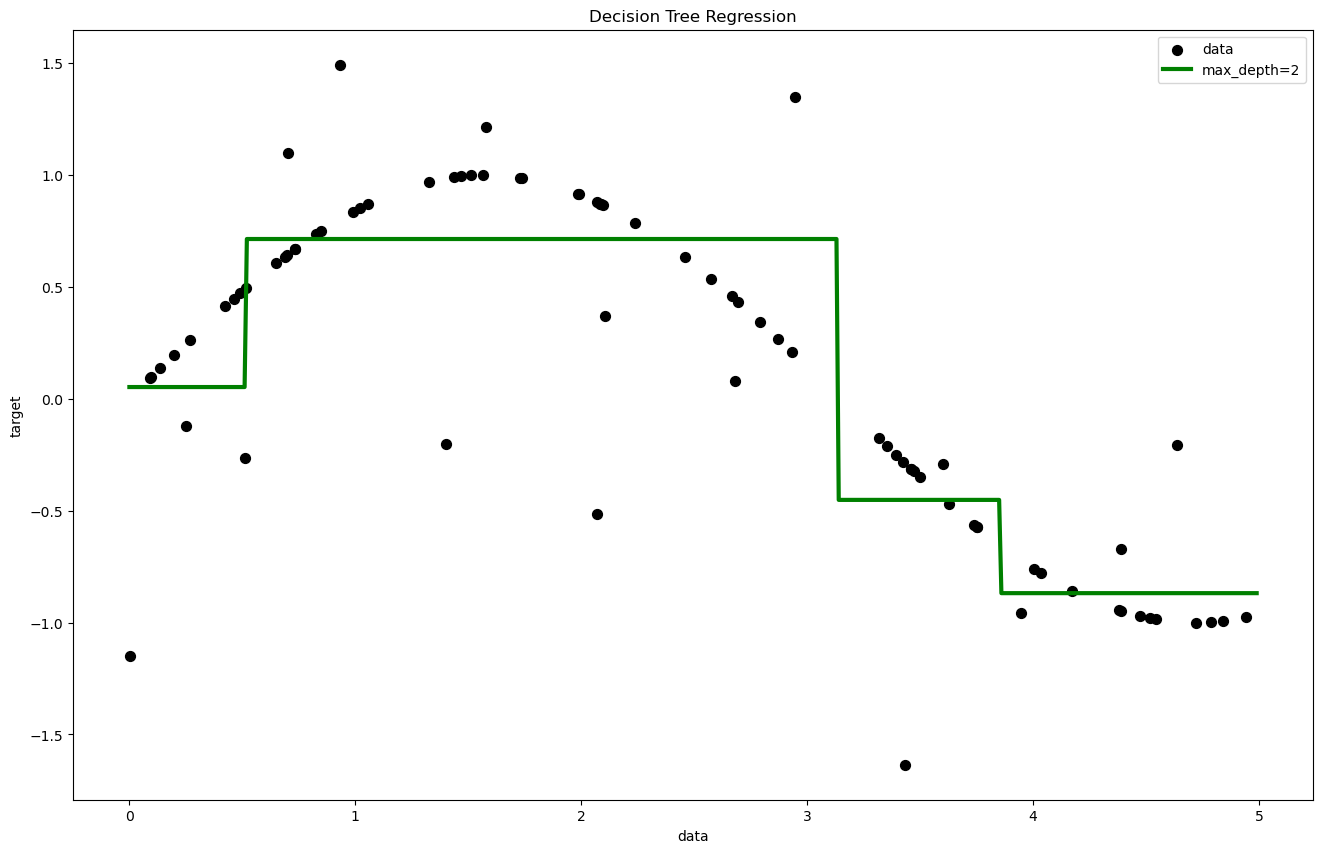

In [11]:
import matplotlib.pyplot as plt

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regr.predict(X_test)

plt.figure(figsize=(16, 10))

plt.scatter(X, y, s=50, color="black", label="data")
plt.plot(X_test, y_pred, color="green", label="max_depth=2", linewidth=3)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [12]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01),
    )

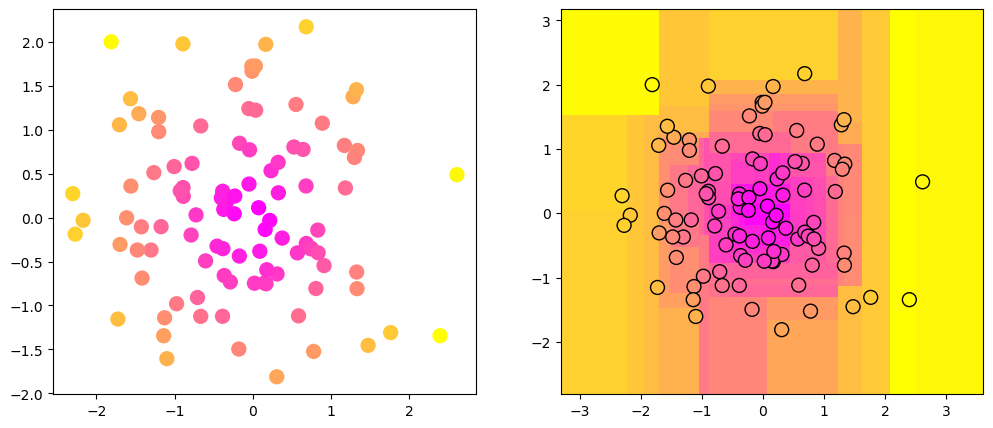

In [13]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

clf = DecisionTreeRegressor()

clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

plt.show()

Let's see how the plane's division will look depending on the *minimum number of samples in a leaf* and *the maximum tree depth*.

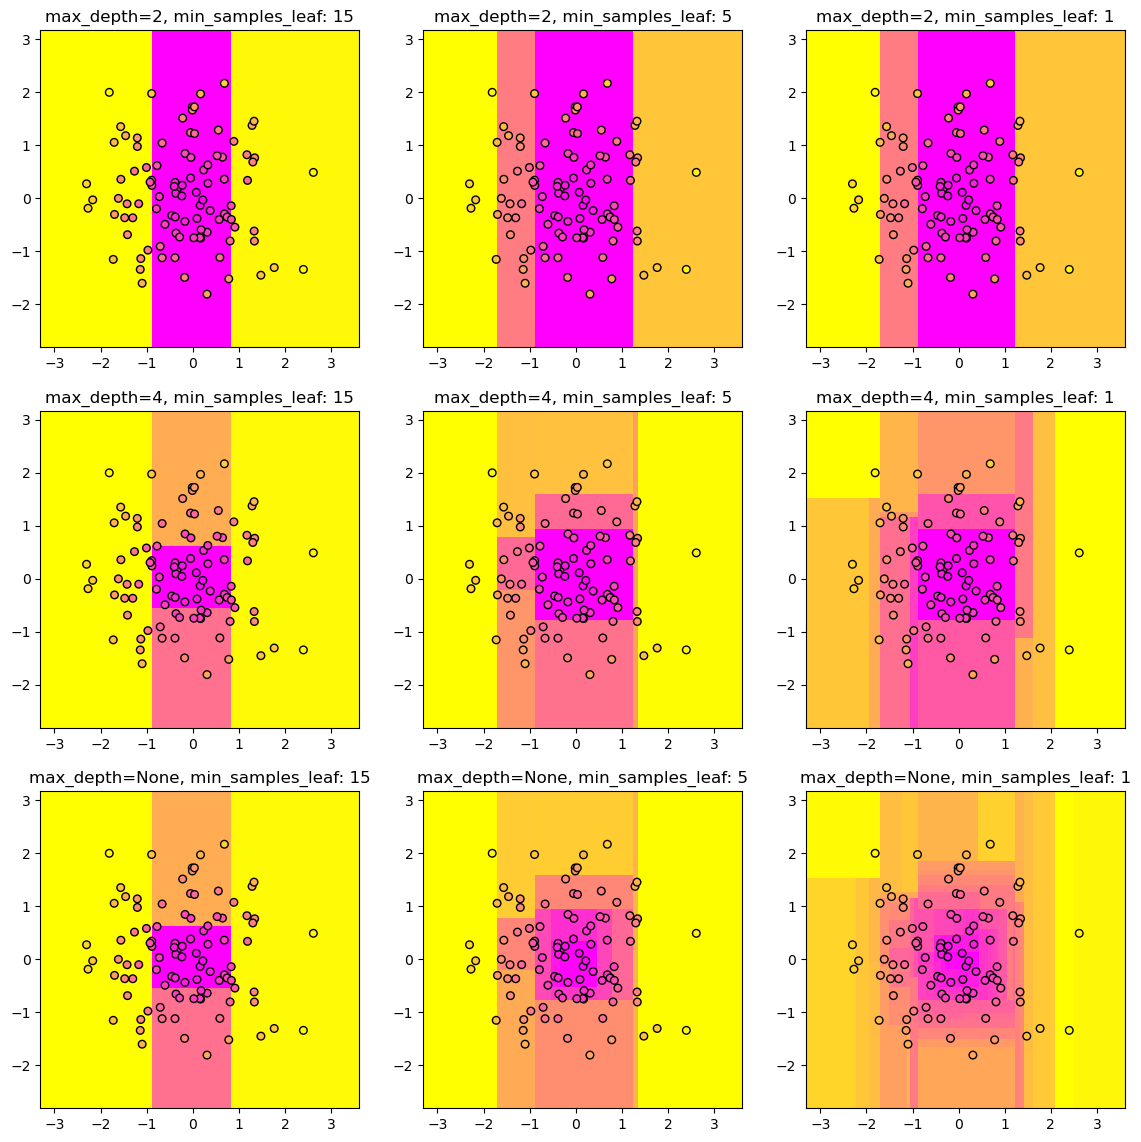

In [14]:
plt.figure(figsize=(14, 14))

for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

#### Question

<details>
<summary>How does increasing the maximum tree depth or decreasing the minimum number of samples in a leaf affect the model's performance on the training set, and what might this lead to overfitting?</summary>
    
Increasing the maximum depth of a decision tree or decreasing the minimum number of samples required in a leaf allows the tree to capture more details and intricacies of the training data. This often leads to higher accuracy on the training set, as the tree can create more specific splits that fit the training data very closely.

However, this flexibility comes at a cost: the model can start to "memorize" the training data instead of learning general patterns. This phenomenon, known as overfitting, occurs when the tree becomes too complex, capturing noise and small variations that don’t generalize well to new, unseen data. As a result, while the training accuracy may be high, the model's performance on validation or test data typically decreases, as it struggles to make accurate predictions for data it hasn't seen before.

</details>

## Instability of Decision Trees

Decision trees are algorithms that are sensitive to changes in the training set, meaning that even slight changes can cause the final classifier to change significantly. Let's examine how the tree structure changes when trained on different 90% subsets of the data.

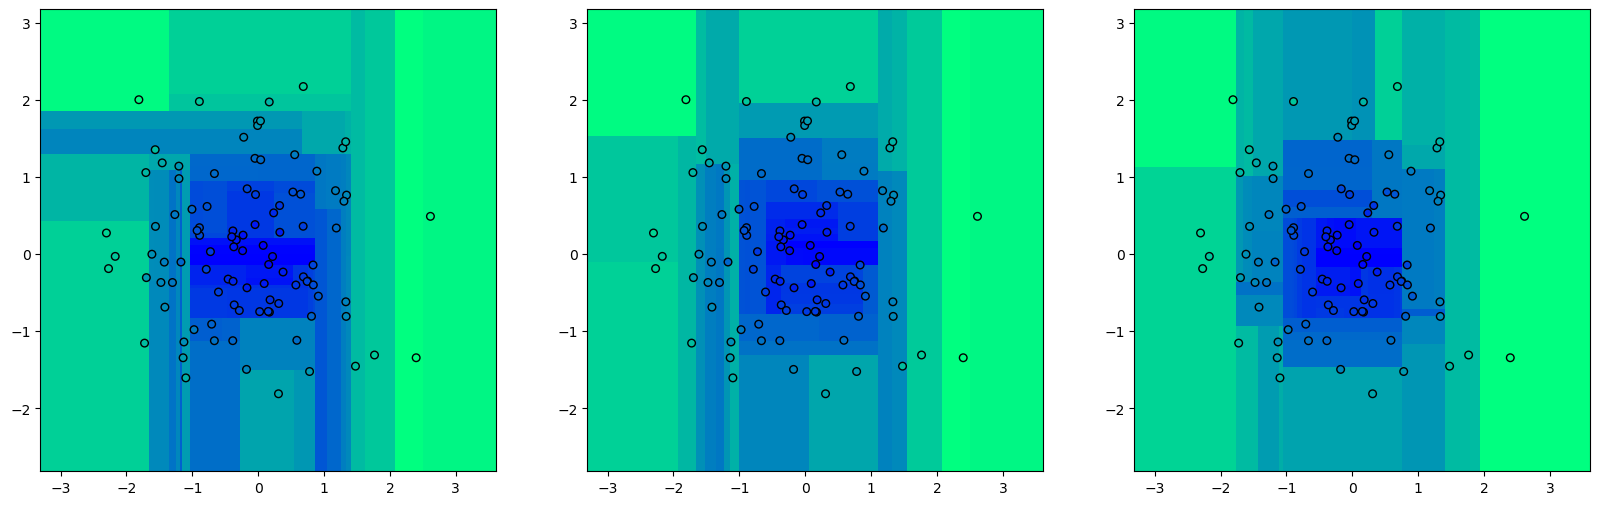

In [15]:
plt.figure(figsize=(20, 6))

for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter', edgecolor='k')

## Categorical Features in Decision Trees

#### Question

<details>
<summary>What are some common methods for handling categorical features in decision trees?</summary>
    
There are several approaches to handling categorical features in decision trees:

- One-hot encoding
- Mean target encoding
- Binary encoding

In some frameworks (such as CatBoost), the number of outgoing edges from a node can be equal to the number of categories in a categorical feature, rather than just 2. This approach allows categorical features to be naturally incorporated into the model.
</details>

## Advantages and Disadvantages

#### Question

<details>
    <summary>What advantages and disadvantages are there for Decision Trees?</summary>
    
**Advantages**

* Highly interpretable
* Easily adaptable for regression and classification tasks
* Can handle heterogeneous data types

**Disadvantages**

* Performs poorly on linearly separable datasets compared to linear algorithms
* Prone to overfitting
* Sensitive to noise, sample composition, and criteria used
    
</details>



## Methods to Mitigate Disadvantages

* Pruning
* Ensemble methods (forests of trees)

### Pruning

There are several approaches to pruning. The simplest method involves trimming leaves and turning the parent node into a leaf with the most frequent class as its label, while monitoring changes in model quality on a validation set. Pruning stops once the quality begins to deteriorate. Alternatively, we can identify a subtree whose removal does not worsen the error on the validation set, as shown in the figure:

<img src='images/seminar_05/pruning.png' Width=800>

## RandomForest

1. **Initialize the Forest**:
   - Set the number of trees \( N \) and other hyperparameters, such as the maximum tree depth, the minimum number of samples per leaf, and the number of features to consider at each split.

2. **Build Each Tree**:
   - For each tree (from 1 to \( N \)):
     1. **Bootstrap Sampling**: Randomly select a subset of the original data with replacement, which will serve as the training sample for this tree. This sample will be approximately the same size as the original dataset but may contain duplicate entries.
     2. **Construct the Tree**:
        - **Feature Selection**: At each split, randomly select a subset of features (usually \(\sqrt{m}\) features for classification tasks or \(m/3\) for regression, where \(m\) is the total number of features).
        - **Optimal Split**: Using the selected subset of features, find the optimal split for the node, maximizing the informativeness criterion (e.g., reducing entropy or impurity for classification).
        - **Recursive Splitting**: Continue splitting nodes recursively until a stopping criterion is met (such as reaching maximum depth, a minimum number of samples per leaf, or when no further improvement is possible).
     3. **Finalize the Tree**: Once the splitting process is complete, add the tree to the forest.

3. **Combine Predictions**:
   - After constructing all \( N \) trees, the random forest combines their predictions. For classification, majority voting is used (selecting the class predicted by the majority of trees), and for regression, the average of all trees' predictions is taken.

In this way, the random forest creates an ensemble of trees, reducing variance and avoiding the overfitting that can occur with individual decision trees.

In [15]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv

--2024-11-13 10:12:42--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: 'telecom_churn.csv.2'

telecom_churn.csv.2 100%[===================>] 273.43K  --.-KB/s    in 0.08s   

2024-11-13 10:12:43 (3.42 MB/s) - 'telecom_churn.csv.2' saved [279997/279997]



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

df = pd.read_csv("telecom_churn.csv")

# Select columns only with numerical data

cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)

X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

results = cross_val_score(rfc, X, y, cv=skf)

print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.50%


Try to change the number of trees:

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 100 trees


Text(0.5, 0, 'N_estimators')

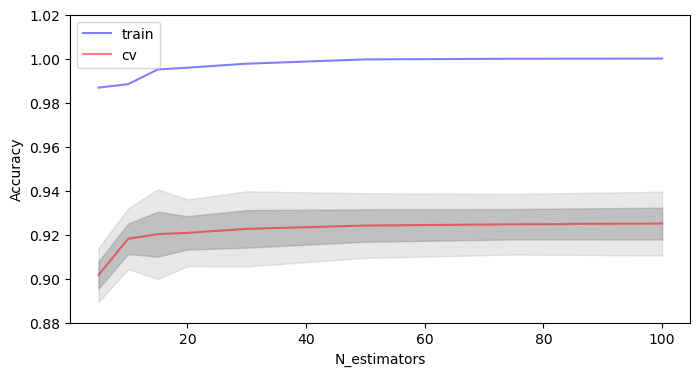

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Try to change `max_depth` of trees:

In [19]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.44% with 24 max_depth


Text(0.5, 0, 'Max_depth')

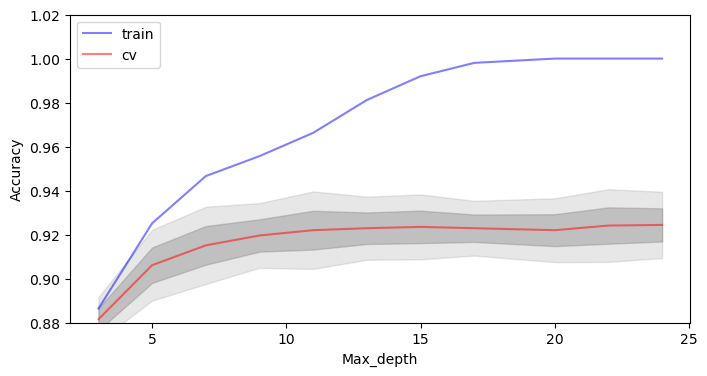

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

Try to change `min_samples` of trees:

In [21]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 1 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

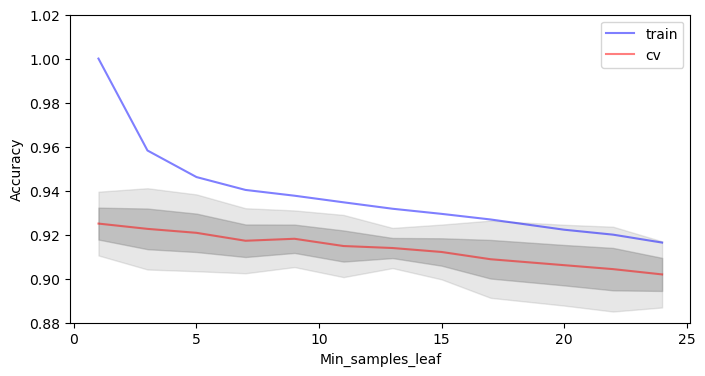

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

Let’s consider the parameter called `max_features`. For classification tasks, the default value is $\sqrt{n}$, where $n$ is the number of features.

In [23]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 4 max_features


Text(0.5, 0, 'Max_features')

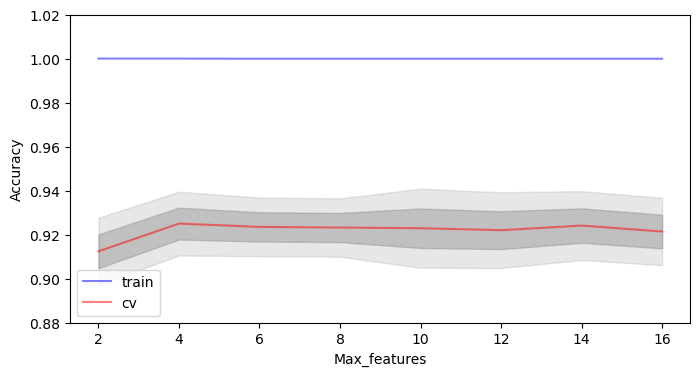

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

Use `GridSearchCV` for search the best hyperparameters:

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

### How is feature importance calculated?

Each node in the tree uses a specific feature to maximize the informativeness criterion. 

For each feature, we can calculate the weighted (by sample size) total (across all nodes) change in the informativeness criterion.

Using these results, features can be ranked by importance.

For a forest, these values can first be averaged across all trees, and then sorted.

In [26]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/hostel_factors.csv

--2024-11-13 10:14:28--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/hostel_factors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874 (2.8K) [text/plain]
Saving to: 'hostel_factors.csv.1'

hostel_factors.csv. 100%[===================>]   2.81K  --.-KB/s    in 0.001s  

2024-11-13 10:14:28 (3.06 MB/s) - 'hostel_factors.csv.1' saved [2874/2874]



Populating the interactive namespace from numpy and matplotlib
Feature ranking:
1. Staff 0.183150 
2. Value for money 0.147704 
3. Shared space condition 0.128188 
4. Additional services 0.116819 
5. Customer Satisfaction Score 0.105748 
6. General conditions and amenities 0.088730 
7. Shared kitchen condition 0.074776 
8. Check-in and check-out at the hostel 0.061881 
9. Hostel booking 0.053899 
10. Room condition 0.039105 


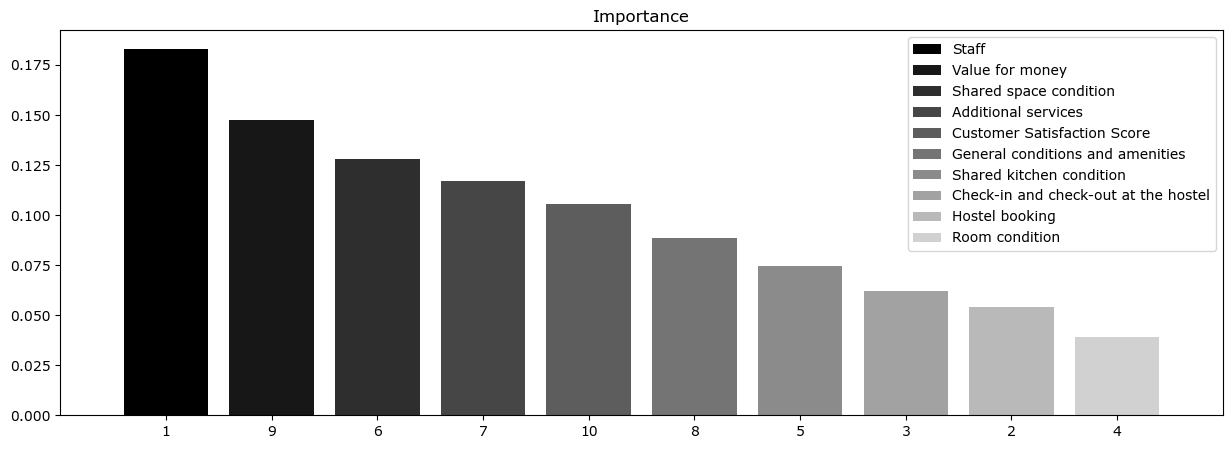

In [27]:
from __future__ import division, print_function

import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns

from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}

rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble._forest import RandomForestRegressor

hostel_data = pd.read_csv("hostel_factors.csv")

features = {
    "f1": "Staff",
    "f2": "Hostel booking",
    "f3": "Check-in and check-out at the hostel",
    "f4": "Room condition",
    "f5": "Shared kitchen condition",
    "f6": "Shared space condition",
    "f7": "Additional services",
    "f8": "General conditions and amenities",
    "f9": "Value for money",
    "f10": "Customer Satisfaction Score"
}

forest = RandomForestRegressor(n_estimators=1000, max_features=10, random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Plot the feature importancies of the forest

num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, features["f"+str(feature_indices[f])], importances[indices[f]]))

plt.figure(figsize=(15,5))
plt.title(u"Importance")

bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]], 
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")

ticks = plt.xticks(range(num_to_plot), feature_indices)

plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) for i in feature_indices])

### Advantages and Disadvantages

**Advantages:**

- Achieves high predictive accuracy; on most tasks, it performs better than linear algorithms, with accuracy comparable to boosting.
- Almost insensitive to outliers in the data due to random sampling.
- Not affected by feature scaling (or any monotonic transformations of feature values), thanks to the use of random subspaces.
- Works well "out of the box" without requiring meticulous parameter tuning. Fine-tuning can provide an additional 0.5% to 3% accuracy increase depending on the task and data.
- Efficiently handles data with a high number of features and classes.
- Handles both continuous and categorical features equally well.
- Rarely overfits; in practice, adding more trees almost always improves the ensemble. On validation, however, the learning curve reaches an asymptote after a certain number of trees.
- Has methods to estimate the importance of individual features in the model.
- Performs well with missing data, maintaining accuracy even if a significant portion of data is missing.
- Allows for balancing class weights across the entire dataset or within each tree’s subset.
- Computes proximity between pairs of samples, which can be used for clustering, outlier detection, or generating insightful data representations through scaling.
- The above capabilities can be extended to unlabeled data, enabling clustering, data visualization, and outlier detection.
- Highly parallelizable and scalable.

**Disadvantages:**

- Unlike a single tree, random forest results are harder to interpret.
- Does not provide formal inference (p-values) for assessing variable importance.
- Performs worse than many linear methods when the dataset has a high number of sparse features (e.g., text data, Bag of Words).
- Does not extrapolate, unlike linear regression (though this can be beneficial, as it avoids extreme values in the presence of outliers).
- Can be prone to overfitting on certain tasks, especially with noisy data.
- For data with categorical variables with varying numbers of levels, random forests may be biased toward features with more levels; when a feature has many levels, the tree will tend to rely more on these features, as they can yield higher optimized function values (like information gain).
- If the data contains groups of correlated features that have similar importance to the labels, smaller groups may be preferred over larger ones.
- Results in a larger model size, requiring \(O(NK)\) memory for storage, where \(K\) is the number of trees.
